Problem Statement: -
This dataset contains information of users in a social network. This social network has several business
clients which can post ads on it. One of the clients has a car company which has just launched a luxury
SUV for a ridiculous price. Build a Bernoulli Naïve Bayes model using this dataset and classify which of 
the users of the social network are going to purchase this luxury SUV. 1 implies that there was a purchase
and 0 implies there wasn’t a purchase.

Business Objectives - When building a Bernoulli Naïve Bayes model to predict which users of a social network 
are likely to purchase a luxury SUV, it's essential to define the business objectives clearly to align 
the model's performance with the goals of the client 

Minimize - Minimize the number of users incorrectly classified as likely to purchase the SUV (false positives), which could lead
to wasted marketing resources and reduced campaign efficiency.

Maximize - Maximize the accuracy of predicting users who are likely to purchase the SUV (true positives), thereby increasing the
conversion rate from ad exposure to purchase.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
car=pd.read_csv("D:/Documents/Datasets/NB_Car_Data.csv")
car

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [9]:
car.shape

(400, 5)

In [11]:
car.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [13]:
car.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [15]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [17]:
car.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [19]:
car.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [21]:
car.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

(array([28., 37., 46., 35., 77., 65., 35., 31., 18., 28.]),
 array([18. , 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8, 60. ]),
 <BarContainer object of 10 artists>)

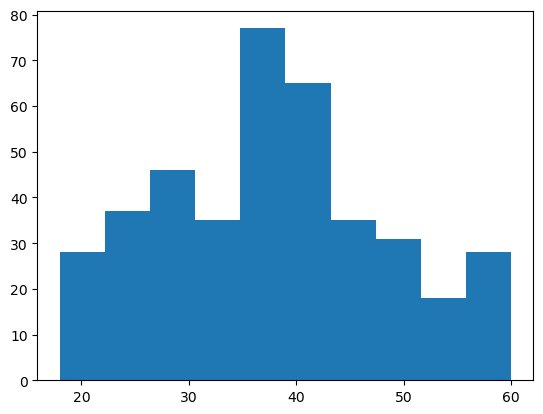

In [23]:
car.drop(['User ID'],axis=1,inplace=True)
car.dtypes
plt.hist(car.Age)

(array([51., 39., 58., 50., 82., 40., 22., 19., 17., 22.]),
 array([ 15000.,  28500.,  42000.,  55500.,  69000.,  82500.,  96000.,
        109500., 123000., 136500., 150000.]),
 <BarContainer object of 10 artists>)

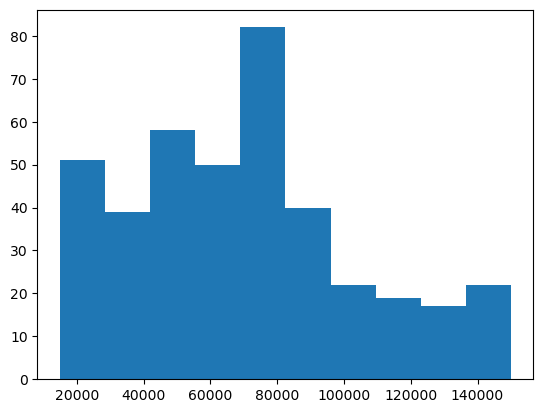

In [24]:
plt.hist(car.EstimatedSalary)

In [27]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
car['Gender']=label_encoder.fit_transform(car['Gender'])
 

In [28]:
def norm_funct(i):
    x=(i-i.min())/(i.max()-i.min())
    return x
car_norm=norm_funct(car)       
car_norm.describe()   

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.490000,0.467976,0.405500,0.357500
std,0.500526,0.249592,0.252570,0.479864
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.279762,0.207407,0.000000
50%,0.000000,0.452381,0.407407,0.000000
75%,1.000000,0.666667,0.540741,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [29]:
from sklearn.model_selection import train_test_split
car_train,car_test=train_test_split(car_norm,test_size=0.2)

col_names1=list(car_train.columns)
train_X=car_train[col_names1[0:2]]
train_y=car_train[col_names1[3]]
col_names2=list(car_train.columns)
test_X=car_test[col_names2[0:2]]
test_y=car_test[col_names2[3]]

In [30]:
from sklearn.naive_bayes import BernoulliNB as BB
classifier_bb=BB()

classifier_bb.fit(train_X,train_y)
test_pred_b=classifier_bb.predict(test_X)
accuracy_test_b=np.mean(test_pred_b==test_y)
accuracy_test_b

0.6875

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(test_pred_b,test_y)
pd.crosstab(test_pred_b,test_y)

Purchased,0.0,1.0
row_0,,
0.0,55,25


In [37]:
#evaluate on train data
train_pred_b=classifier_bb.predict(train_X)
accuracy_train_b=np.mean(train_pred_b==train_y)
accuracy_train_b

0.63125

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(train_pred_b,train_y)
pd.crosstab(train_pred_b,train_y)

Purchased,0.0,1.0
row_0,,
0.0,202,118


In [41]:
classifier_bb_lap=BB(alpha=0.25)
classifier_bb_lap.fit(train_X,train_y)

#evaluate on test data
test_pred_lap=classifier_bb_lap.predict(test_X)
#Accuracy of the prediction
accuracy_test_lap=np.mean(test_pred_lap==test_y)
accuracy_test_lap
#confusion matrix
from sklearn.metrics import accuracy_score
accuracy_score(test_pred_lap,test_y)
pd.crosstab(test_pred_lap,test_y)

Purchased,0.0,1.0
row_0,,
0.0,55,25


In [43]:
#evaluate the train data
train_pred_lap=classifier_bb.predict(train_X)
accuracy_train_lap=np.mean(train_pred_lap==train_y)
accuracy_train_lap


0.63125

In [45]:
#confusion matrix
from sklearn.metrics import accuracy_score
accuracy_score(train_pred_lap,train_y)
pd.crosstab(train_pred_lap,train_y)

Purchased,0.0,1.0
row_0,,
0.0,202,118
